In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import UnivariateSpline
from scipy import interpolate

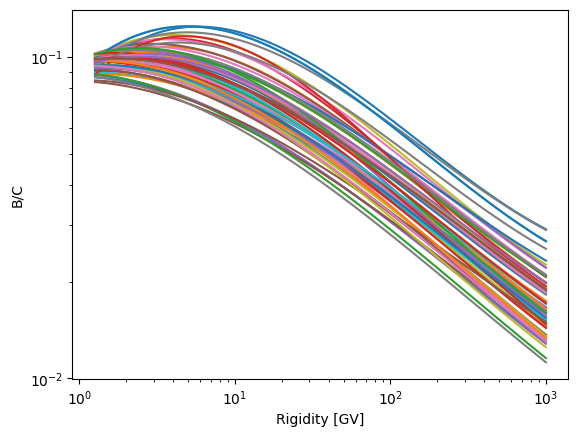

In [63]:
fig, ax = plt.subplots()
plt.xlabel('Rigidity [GV]')
plt.ylabel('B/C')
plt.xscale("log")
plt.yscale("log")
for i in range(1, 69):
    # Costruisci i nomi dei file
    file_B = f'B{i:02d}.dat.txt'  # B01.dat.txt, B02.dat.txt, ..., B68.dat.txt
    file_C = f'C{i:02d}.dat.txt'  # C01.dat.txt, C02.dat.txt, ..., C68.dat.txt
    #print(file_B)
    #print(file_C)
# Importa i dati dai file
    dataB = np.loadtxt(file_B, delimiter=' ')
    dataC = np.loadtxt(file_C, delimiter=' ')
    rig_GV_B = np.round(dataB[:,0],4)
    rig_GV_C = np.round(dataC[:,0],4)
    Log_Rig_B = np.log10(rig_GV_B)
    Log_Rig_C = np.log10(rig_GV_C)
    mod_sp_B = dataB[:,1]
    mod_sp_C = dataC[:,1]
    Log_mod_sp_B = np.log10(mod_sp_B)
    Log_mod_sp_C = np.log10(mod_sp_C)
    #print(rig_GV_C)
    #print(Log_mod_sp_C.shape)
    #print(Log_Rig_C.shape)
    splineB = UnivariateSpline(Log_Rig_B , Log_mod_sp_B)
    splineC = UnivariateSpline(Log_Rig_C , Log_mod_sp_C)
    x_val = np.linspace(0.1, 3, 100) #plotto nel range di rigidità da 0.1 GV a 10^3 GV, 100 valori
    x_rig = 10**x_val
    yB = splineB(x_val)
    yC = splineC(x_val)
    B_over_C = 10**yB / 10**yC
    ax.plot(x_rig, 0.3*B_over_C)